<a href="https://colab.research.google.com/github/yashkochar14/ZOMATO-DATA-ANALYSIS/blob/main/Zomato.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Zomato Data Analysis Project**

In [3]:
#IMPORTING LIBRARIES

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [5]:
# CREATE THE DATAFRAME

In [7]:
dataframe = pd.read_csv('Zomato data .csv')

In [9]:
dataframe

,name,online_order,book_table,rate,votes,approx_cost(for two people),listed_in(type)
0,Jalsa,Yes,Yes,4.1/5,775,800,Buffet
1,Spice Elephant,Yes,No,4.1/5,787,800,Buffet
2,San Churro Cafe,Yes,No,3.8/5,918,800,Buffet
3,Addhuri Udupi Bhojana,No,No,3.7/5,88,300,Buffet
4,Grand Village,No,No,3.8/5,166,600,Buffet
...,...,...,...,...,...,...,...
143,Melting Melodies,No,No,3.3/5,0,100,Dining
144,New Indraprasta,No,No,3.3/5,0,150,Dining
145,Anna Kuteera,Yes,No,4.0/5,771,450,Dining
146,Darbar,No,No,3.0/5,98,800,Dining


**convert the data type of col rate**

In [12]:
def handleRate(value):
    value = str(value).split('/')
    value=value[0];
    return float(value)

dataframe["rate"]= dataframe["rate"].apply(handleRate)
print(dataframe.head())

                    name online_order book_table  rate  votes  \
0                  Jalsa          Yes        Yes   4.1    775   
1         Spice Elephant          Yes         No   4.1    787   
2        San Churro Cafe          Yes         No   3.8    918   
3  Addhuri Udupi Bhojana           No         No   3.7     88   
4          Grand Village           No         No   3.8    166   

   approx_cost(for two people) listed_in(type)  
0                          800          Buffet  
1                          800          Buffet  
2                          800          Buffet  
3                          300          Buffet  
4                          600          Buffet  


In [13]:
dataframe.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 148 entries, 0 to 147
Data columns (total 7 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   name                         148 non-null    object 
 1   online_order                 148 non-null    object 
 2   book_table                   148 non-null    object 
 3   rate                         148 non-null    float64
 4   votes                        148 non-null    int64  
 5   approx_cost(for two people)  148 non-null    int64  
 6   listed_in(type)              148 non-null    object 
dtypes: float64(1), int64(2), object(4)
memory usage: 8.2+ KB


In [14]:
dataframe.describe()

,rate,votes,approx_cost(for two people)
count,148.000000,148.000000,148.000000
mean,3.633108,264.810811,418.243243
std,0.402271,653.676951,223.085098
min,2.600000,0.000000,100.000000
25%,3.300000,6.750000,200.000000
50%,3.700000,43.500000,400.000000
75%,3.900000,221.750000,600.000000
max,4.600000,4884.000000,950.000000


In [15]:
#typr of restraunt

In [16]:
dataframe.head()

,name,online_order,book_table,rate,votes,approx_cost(for two people),listed_in(type)
0,Jalsa,Yes,Yes,4.1,775,800,Buffet
1,Spice Elephant,Yes,No,4.1,787,800,Buffet
2,San Churro Cafe,Yes,No,3.8,918,800,Buffet
3,Addhuri Udupi Bhojana,No,No,3.7,88,300,Buffet
4,Grand Village,No,No,3.8,166,600,Buffet


#ANSWER1: majority of restraunt falls under dining category

Text(0.5, 0, 'type of restraunt')

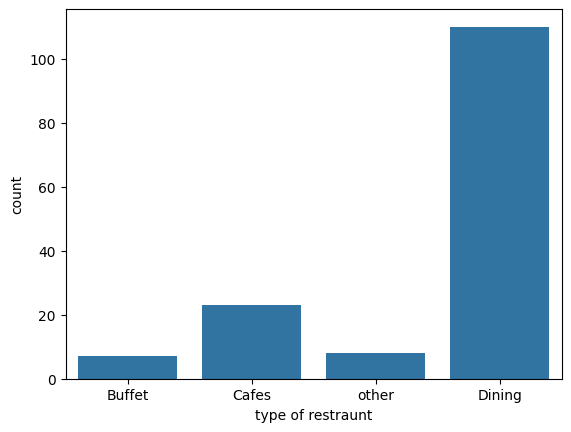

In [18]:
sns.countplot(x=dataframe['listed_in(type)'])
plt.xlabel("type of restraunt")

In [19]:
dataframe.head()

,name,online_order,book_table,rate,votes,approx_cost(for two people),listed_in(type)
0,Jalsa,Yes,Yes,4.1,775,800,Buffet
1,Spice Elephant,Yes,No,4.1,787,800,Buffet
2,San Churro Cafe,Yes,No,3.8,918,800,Buffet
3,Addhuri Udupi Bhojana,No,No,3.7,88,300,Buffet
4,Grand Village,No,No,3.8,166,600,Buffet


# **ANSWER2: Dining Restraunt have got more votes**

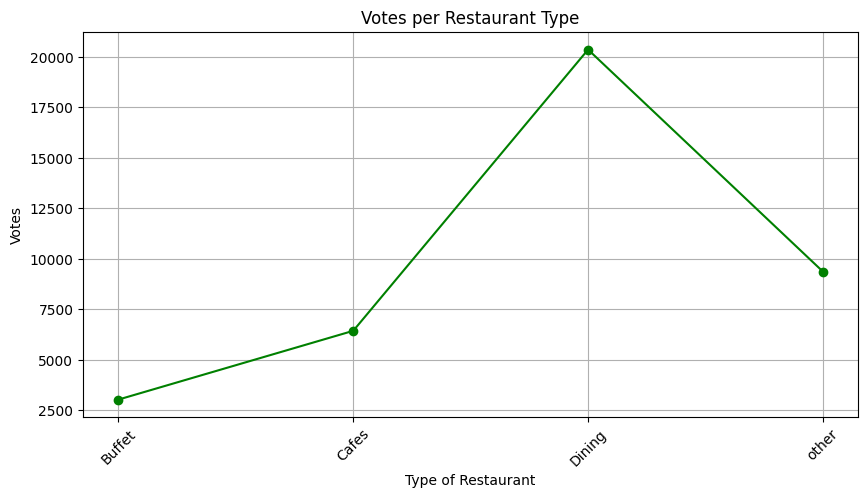

In [29]:
# Grouping the data
grouped_data = dataframe.groupby("listed_in(type)")['votes'].sum()

# Converting to DataFrame
result = pd.DataFrame({'type': grouped_data.index, 'votes': grouped_data.values})

# Plotting
plt.figure(figsize=(10, 5))
plt.plot(result['type'], result['votes'], c="green", marker="o", linestyle="-")
plt.xticks(rotation=45)
plt.xlabel("Type of Restaurant")
plt.ylabel("Votes")
plt.title("Votes per Restaurant Type")
plt.grid(True)

# ***ANSWER :Majority Restraunt have secured a rating from 3.5 to 4***

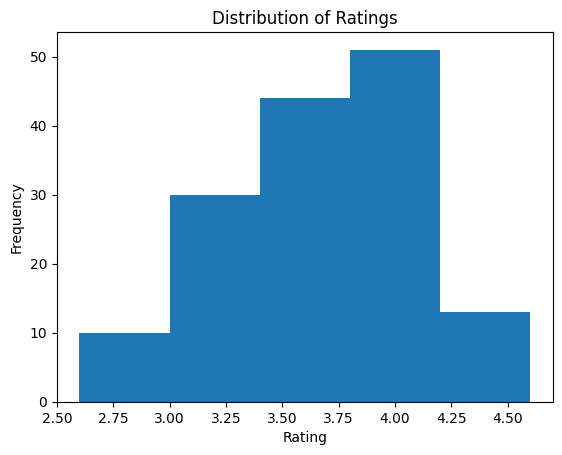

In [31]:
plt.hist(dataframe['rate'],bins=5)
plt.title("Distribution of Ratings")
plt.xlabel("Rating")
plt.ylabel("Frequency")
plt.show()

# ***Average Spending by couple: Rs.300***

<Axes: xlabel='approx_cost(for two people)', ylabel='count'>

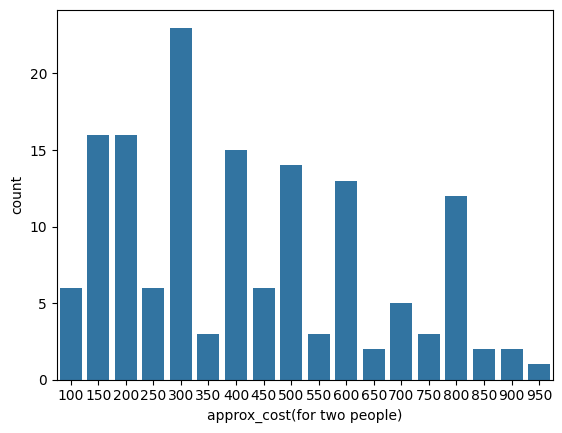

In [32]:
couple_data= dataframe["approx_cost(for two people)"]
sns.countplot(x=couple_data)


# Which mode receives maximum rating?
***Offline Order receives lower rating gin comparison to online order***

In [33]:
dataframe.head()

,name,online_order,book_table,rate,votes,approx_cost(for two people),listed_in(type)
0,Jalsa,Yes,Yes,4.1,775,800,Buffet
1,Spice Elephant,Yes,No,4.1,787,800,Buffet
2,San Churro Cafe,Yes,No,3.8,918,800,Buffet
3,Addhuri Udupi Bhojana,No,No,3.7,88,300,Buffet
4,Grand Village,No,No,3.8,166,600,Buffet


<Axes: xlabel='online_order', ylabel='rate'>

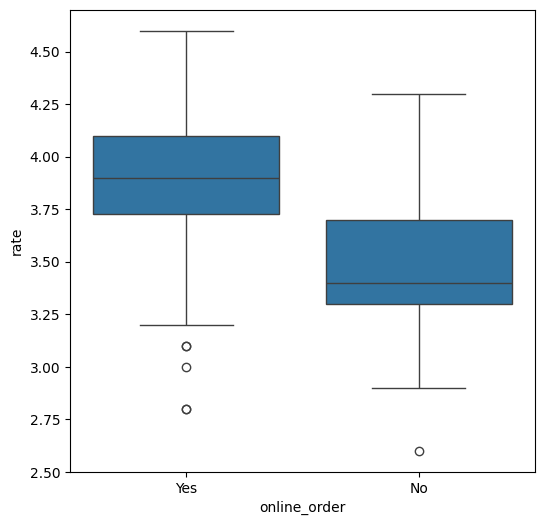

In [36]:
plt.figure(figsize=(6,6))
sns.boxplot(x='online_order',y='rate',data=dataframe)

# ***HEATMAP***

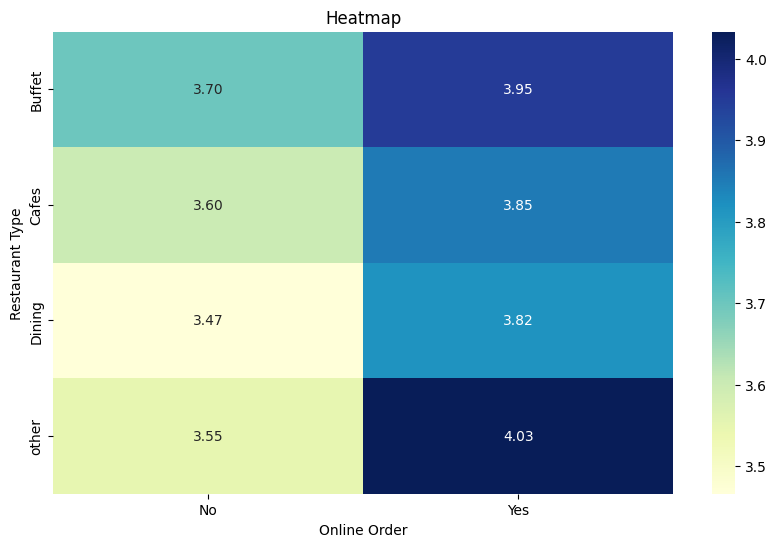

In [44]:
# Fix pivot table creation
pivot_table = dataframe.pivot_table(index='listed_in(type)',
                                    columns='online_order',  # Ensure correct column name
                                    values='rate',
                                    aggfunc='mean',  # Use mean instead of size
                                    fill_value=0)

# Create heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(pivot_table, annot=True, cmap='YlGnBu', fmt='.2f')  # fmt='.2f' for decimal values

# Labels & title
plt.title('Heatmap')
plt.ylabel('Restaurant Type')
plt.xlabel('Online Order')

plt.show()


In [45]:
#ANSWER: Dining restraunt primarily accept offline order whereas cafes primarily recives online order. This suggest that clients prefere orders in person at restraunts, but prefer online ordering at cafes

